#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [9]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [10]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [11]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [12]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [13]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [39]:
model = Sequential()

#卷積層1

In [40]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [41]:
model.add(Dropout(rate=0.25))

In [42]:
model.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層2與池化層2

In [43]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [44]:
model.add(Dropout(0.25))

In [45]:
model.add(MaxPooling2D(pool_size=(2, 2)))

#建立神經網路(平坦層、隱藏層、輸出層)

In [46]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [47]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [48]:
model.add(Dense(10, activation='softmax'))

In [49]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [51]:
try:
   # model.load_weights("data/cifarCnnModel_HW.h5")
    model.load_weights('data/day_071_cnn_1.weight')
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

### (1). Loss:  'MSE'

In [52]:
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 189s 5ms/step - loss: 0.0904 - acc: 0.1021 - val_loss: 0.0898 - val_acc: 0.1193
Epoch 2/12
37500/37500 [==============================] - 190s 5ms/step - loss: 0.0900 - acc: 0.1130 - val_loss: 0.0897 - val_acc: 0.1438
Epoch 3/12
37500/37500 [==============================] - 189s 5ms/step - loss: 0.0899 - acc: 0.1217 - val_loss: 0.0897 - val_acc: 0.1486
Epoch 4/12
37500/37500 [==============================] - 189s 5ms/step - loss: 0.0898 - acc: 0.1260 - val_loss: 0.0896 - val_acc: 0.1558
Epoch 5/12
37500/37500 [==============================] - 183s 5ms/step - loss: 0.0896 - acc: 0.1334 - val_loss: 0.0895 - val_acc: 0.1637
Epoch 6/12
37500/37500 [==============================] - 177s 5ms/step - loss: 0.0895 - acc: 0.1363 - val_loss: 0.0894 - val_acc: 0.1780
Epoch 7/12
37500/37500 [==============================] - 178s 5ms/step - loss: 0.0894 - acc: 0.1472 - val_loss: 0.0894 - 

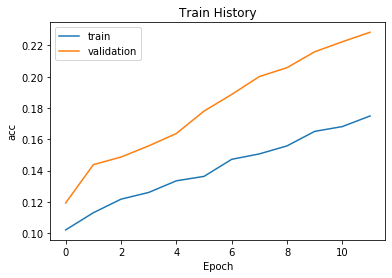

In [54]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history,'acc','val_acc')

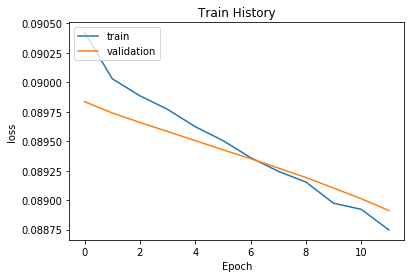

In [55]:
show_train_history(train_history,'loss','val_loss')

In [57]:
# 模型結構存檔
from keras.models import model_from_json
import os

data_path = 'data/'
# 模型訓練結果存檔
json_string = model.to_json()
with open(os.path.join(data_path, 'day_071_cnn_1.config'), "w") as text_file:
    text_file.write(json_string)
model.save_weights(os.path.join(data_path,"day_071_cnn_1.weight"

SyntaxError: unexpected EOF while parsing (<ipython-input-57-1561d13536f5>, line 10)

### (2). Loss:  'binary_crossentropy'

In [ ]:
try:
   # model.load_weights("data/cifarCnnModel_HW.h5")
    model.load_weights('data/day_071_cnn_2.weight')
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

In [30]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 191s 5ms/step - loss: 0.3172 - acc: 0.9000 - val_loss: 0.3167 - val_acc: 0.9000
Epoch 2/12
37500/37500 [==============================] - 185s 5ms/step - loss: 0.3129 - acc: 0.9000 - val_loss: 0.3129 - val_acc: 0.9000
Epoch 3/12
37500/37500 [==============================] - 187s 5ms/step - loss: 0.3074 - acc: 0.9000 - val_loss: 0.3082 - val_acc: 0.9000
Epoch 4/12
37500/37500 [==============================] - 186s 5ms/step - loss: 0.3017 - acc: 0.9001 - val_loss: 0.3037 - val_acc: 0.9000
Epoch 5/12
37500/37500 [==============================] - 192s 5ms/step - loss: 0.2970 - acc: 0.9002 - val_loss: 0.2995 - val_acc: 0.9000
Epoch 6/12
37500/37500 [==============================] - 183s 5ms/step - loss: 0.2935 - acc: 0.9004 - val_loss: 0.2967 - val_acc: 0.9000
Epoch 7/12
37500/37500 [==============================] - 191s 5ms/step - loss: 0.2909 - acc: 0.9005 - val_loss: 0.2940 - 

In [31]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

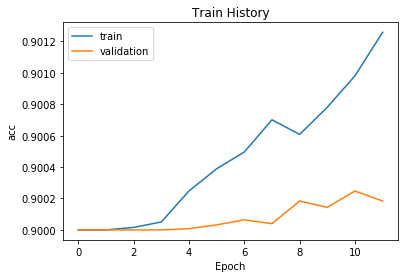

In [34]:
show_train_history(train_history,'acc','val_acc')

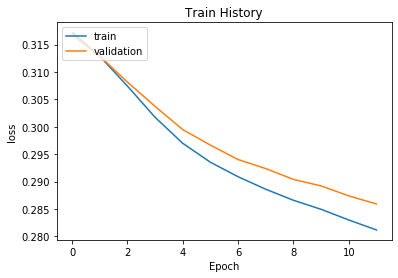

In [33]:
show_train_history(train_history,'loss','val_loss')

In [38]:
# 模型結構存檔
from keras.models import model_from_json
import os

data_path = 'data
# 模型訓練結果存檔
json_string = model.to_json()
with open(os.path.join(data_path, 'day_071_cnn_2.config'), "w") as text_file:
    text_file.write(json_string)
model.save_weights(os.path.join(data_path,"day_071_cnn_2.weight"))